In [93]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glass/glass.csv


In [94]:
import pandas as pd

# Load Data 
file_path = "/kaggle/input/glass/glass.csv"
data = pd.read_csv(file_path) 
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [95]:
data['Type'].value_counts()


Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

#  LabelEncoder
#label_encoders = {}
#for column in data.select_dtypes(include=['object']).columns:
  #  le = LabelEncoder()
   # data[column] = le.fit_transform(data[column])
    #label_encoders[column] = le

#   Splite X& Y        
X = data.drop('Type', axis=1)
y = data['Type'] -1

# Scalling "standard scaler"
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




#     Splite data train & Test 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



# Convert y to one-hot encoding
#y_train = to_categorical(y_train, num_classes=6)
#y_test = to_categorical(y_test, num_classes=6)

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Input

# Build  ANN
model = Sequential()


# Add first layer (input layer )       
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# Add first layer (hidden layer ) , 128 neural units and Relu function activation       
model.add(Dense(128, activation='relu'))


model.add(Dense(128, activation='relu'))

# Add other (hidden layer ) , 128 neural units and Relu function activation 
model.add(Dense(256, activation='relu'))

# Add other (hidden layer ) , 128 neural units and Relu function activation 
model.add(Dense(128, activation='relu'))

# Add output layer  
model.add(Dense(7,activation='softmax'))



# Model Summary 
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,127 (395.03 KB)

 Trainable params: 101,127 (395.03 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
# Compile the model before training
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [99]:
# Traning Model 
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.2974 - loss: 1.8536 - val_accuracy: 0.4286 - val_loss: 1.5107
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6038 - loss: 1.3588 - val_accuracy: 0.4857 - val_loss: 1.3663
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6682 - loss: 1.0404 - val_accuracy: 0.5429 - val_loss: 1.2405
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7155 - loss: 0.8078 - val_accuracy: 0.6571 - val_loss: 1.4617
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7328 - loss: 0.6676 - val_accuracy: 0.6000 - val_loss: 1.3729
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7634 - loss: 0.6606 - val_accuracy: 0.5714 - val_loss: 1.7933
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8169 - loss: 0.5780 - val_accuracy: 0.5429 - val_loss: 1.9775
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7539 - loss: 0.5496 - val_accuracy: 0.6286 - 

In [100]:
# Evaluate the model 
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8135 - loss: 2.2329 


[2.1152477264404297, 0.8139534592628479]

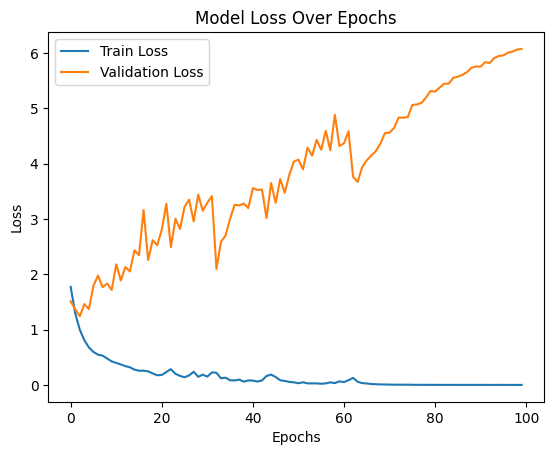

In [101]:
import matplotlib.pyplot as plt
# Plot training & validation loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

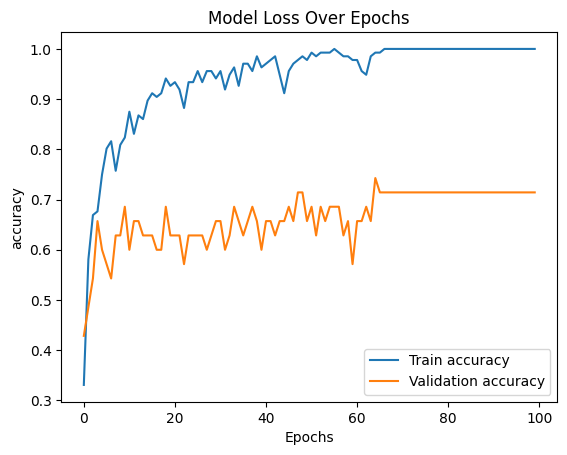

In [102]:
# Plot training & validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()